# Capstone - Wrangeling & Visualizations

##### Author   : Mehrnoosh Behzadi
##### Contact : mehrnoosh.behzadi@gmail.com
##### Date       : July 10th, 2023

## Introduction

In this section, we present an analysis of the "The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)" dataset. The main objective of this analysis is to identify and visualize tumor-specific MRI slices for patients diagnosed with Diffuse Glioma.

In [17]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nibabel as nib
import re
import os
from PIL import Image

The dataset comprises a collection of 3D MRI images, each associated with relevant clinical information. To perform a comprehensive analysis, we start by reading and storing the clinical data into a pandas DataFrame.

In [29]:
# Read in and store the clinical data 
df_clinical = pd.read_csv('UCSF-PDGM-metadata_v2.csv')

 ### Visualization of Tumor Slices with Maximum Value Highlighted in 3D MRI Images

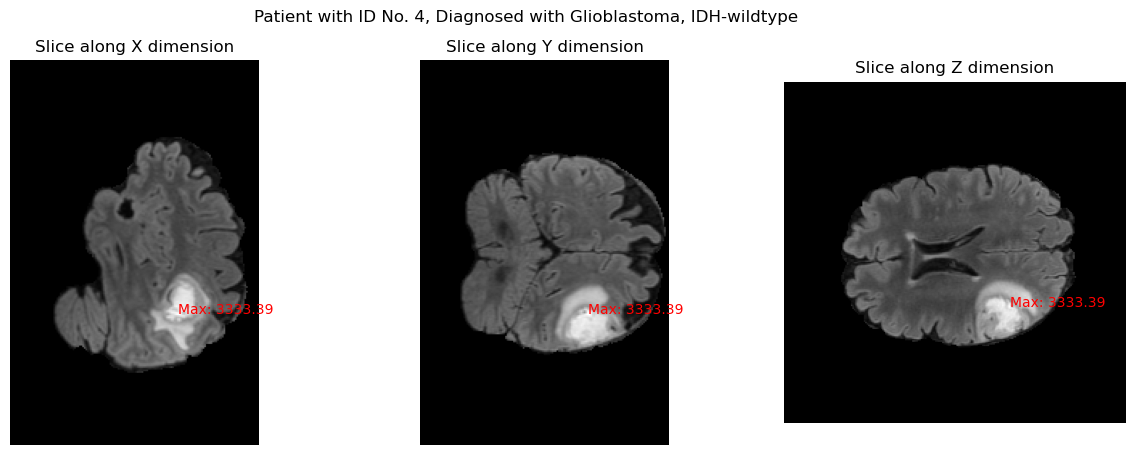

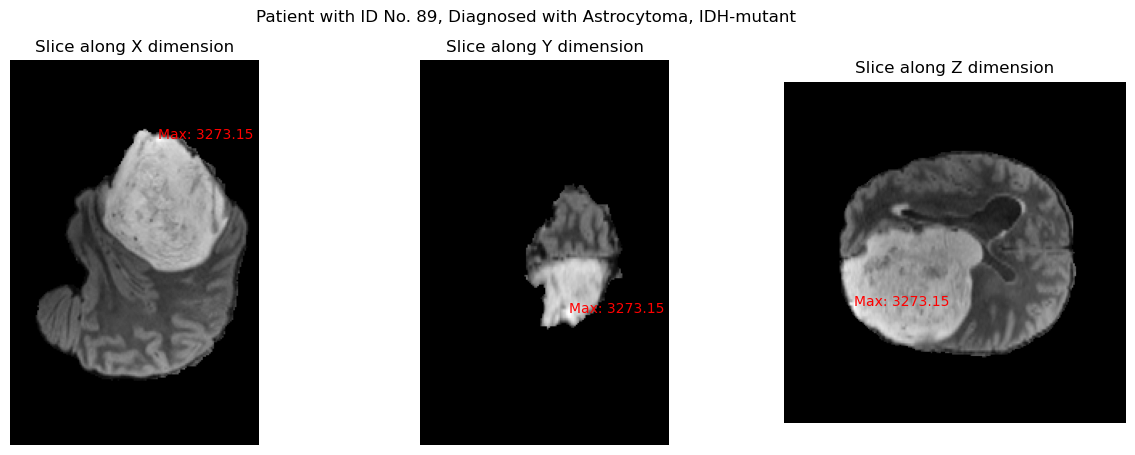

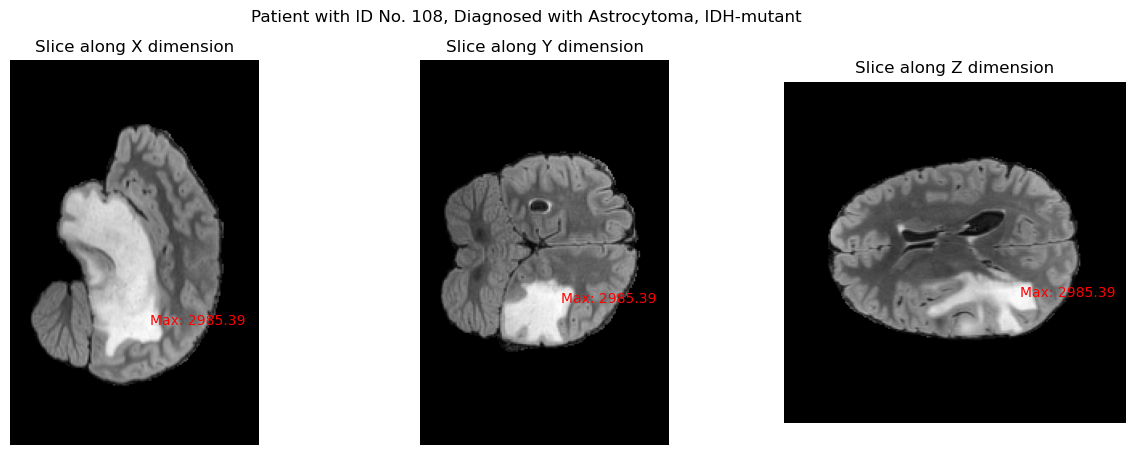

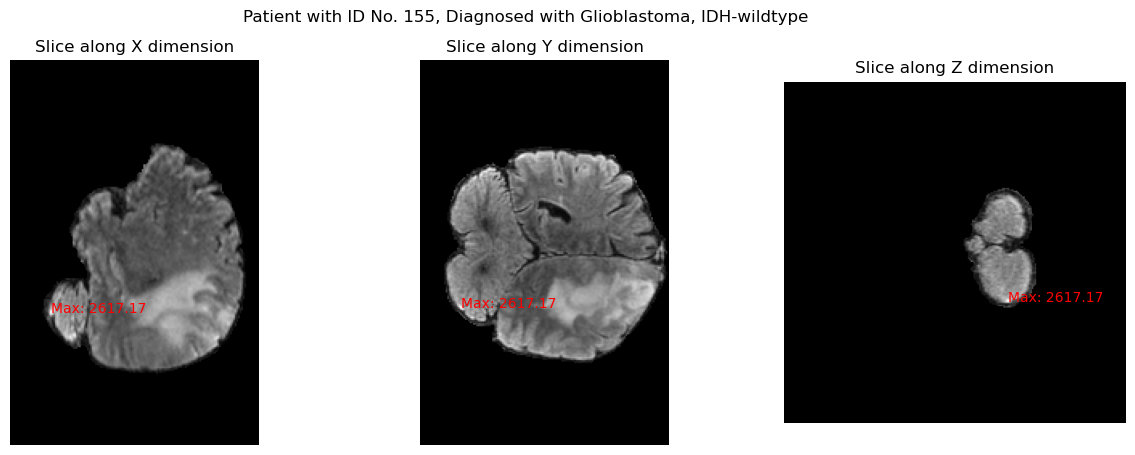

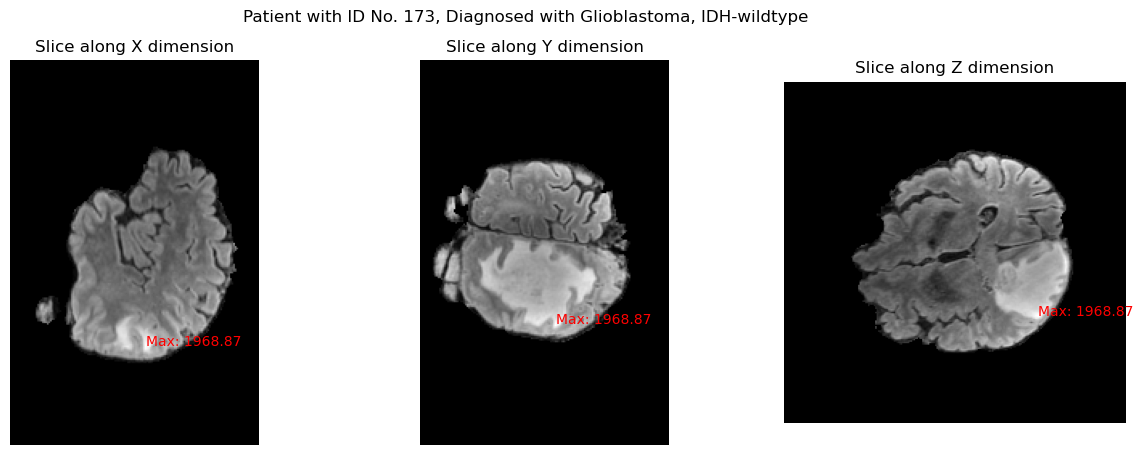

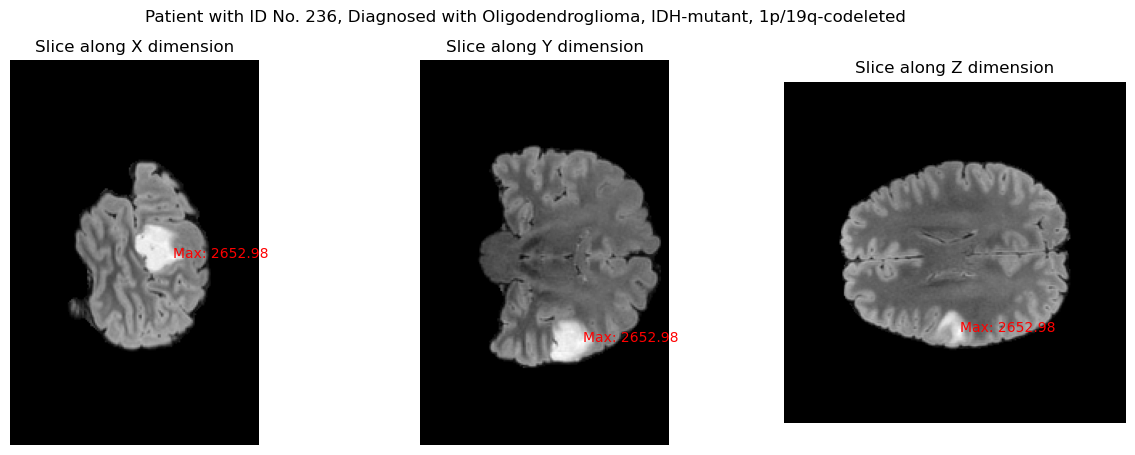

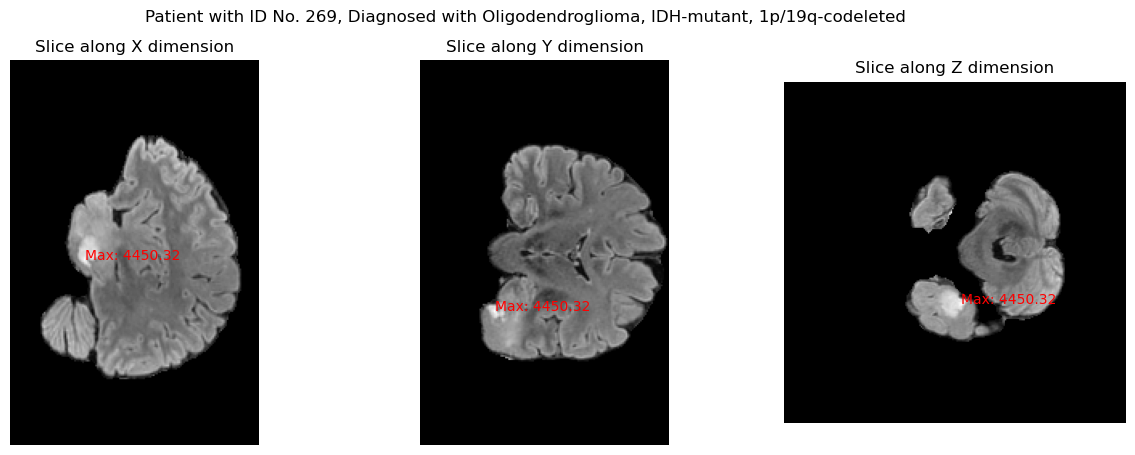

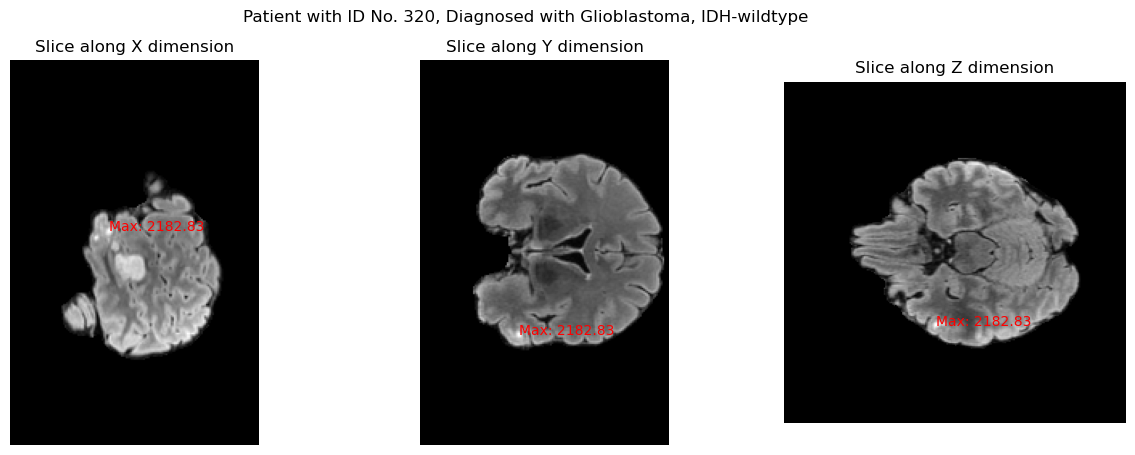

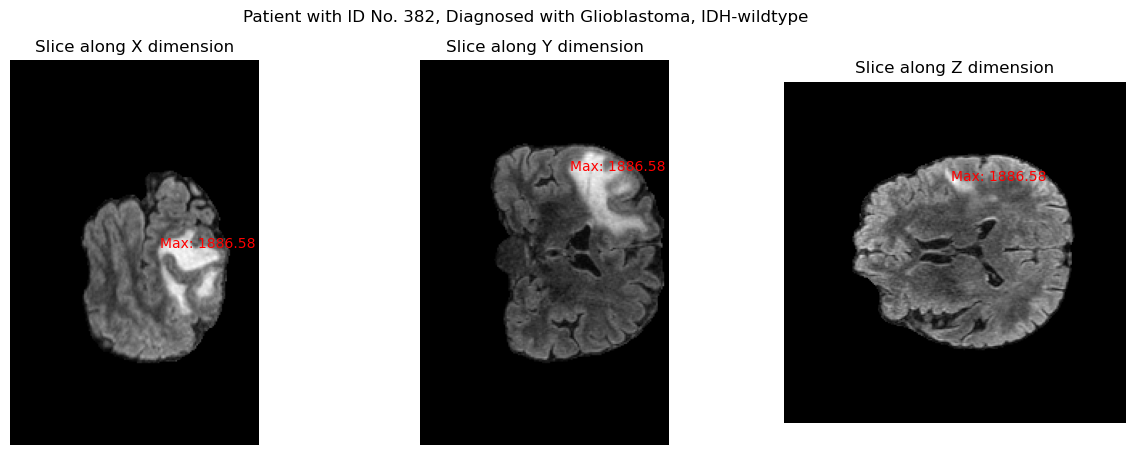

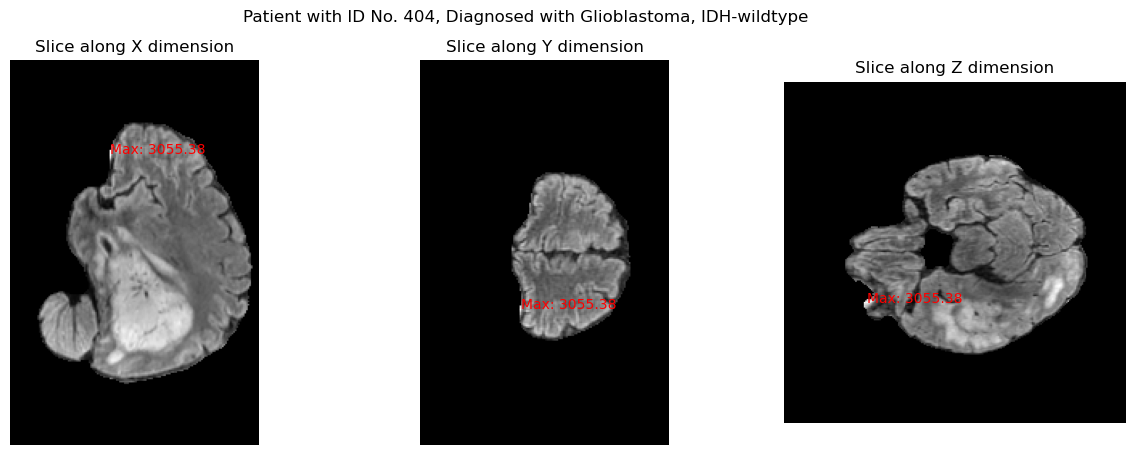

In [4]:
# Specify the folder path where the images are located
folder_path = 'The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'

# Load and extract the 2D slices along X, Y, and Z dimensions
for file_name in os.listdir(folder_path):
    if file_name.endswith('.nii.gz'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the image using nibabel
        image = nib.load(file_path)
        data = image.get_fdata()
        
        # Extract the numeric part from the image name and remove the first zero
        numeric_part = re.search(r'0*(\d+)', file_name).group(1)
        
        # Find the corresponding row in the data frame using the ID column
        row = df_clinical[df_clinical['ID'].str.contains(numeric_part)]
        
        diagnosis = row['Final pathologic diagnosis (WHO 2021)'].values[0]
        
        # Find the maximum value in the image - we're assuming that the maximum value belongs to the tumor
        max_value = np.max(data[150:240, :, :])
            
        # Find the indices where the maximum value occurs
        max_indices = np.where(data == max_value)
            
        # Extract the sections containing the maximum value
        slice_x = data[max_indices[0][0], :, :]
        slice_y = data[:, max_indices[1][0], :]
        slice_z = data[:, :, max_indices[2][0]]
            
        # Plot the tumor slices with the maximum value highlighted in red
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            
        axes[0].imshow(slice_x, cmap='gray')
        axes[0].set_title('Slice along X dimension')
        axes[0].axis('off')
        axes[0].text(max_indices[2][0], max_indices[1][0], f"Max: {max_value:.2f}", color='red')
            
        axes[1].imshow(slice_y, cmap='gray')
        axes[1].set_title('Slice along Y dimension')
        axes[1].axis('off')
        axes[1].text(max_indices[2][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')
            
        axes[2].imshow(slice_z, cmap='gray')
        axes[2].set_title('Slice along Z dimension')
        axes[2].axis('off')
        axes[2].text(max_indices[1][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')
            
        plt.suptitle(f"Patient with ID No. {numeric_part}, Diagnosed with {diagnosis}")
        plt.show()

In [5]:
image.shape

(240, 240, 155)

Visualizing tumor-specific regions are demonstrated in 3D MRI images from the "The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)" dataset. By identifying and extracting the maximum values in the MRI data, the code effectively pinpoints regions most likely to be associated with tumors. The red markers highlight these specific areas within the X, Y, and Z slices, providing an intuitive representation for medical professionals to examine.

This approach is particularly insightful as it allows for a quick and accurate identification of potential tumor locations, which can significantly aid in diagnosing Diffuse Glioma. The ability to visualize the tumor regions in three dimensions (X, Y, and Z) enhances the comprehensive understanding of the tumor's spatial distribution within the brain.

Furthermore, by correlating the MRI slices with the clinical data, medical experts can gain valuable insights into patients' final pathologic diagnoses. This integration of imaging data and clinical information strengthens the potential for accurate diagnoses and tailored treatment plans, ultimately improving patient care and outcomes.

However, it is essential to be mindful of potential limitations. One such concern is the possibility of false-positive identifications due to noise present in the data. MRI data can sometimes contain artifacts or noise with high values that may mistakenly be interpreted as tumor regions.

### Extraction and Visualization of Collapsed MRI Slices Along X, Y, and Z Dimensions

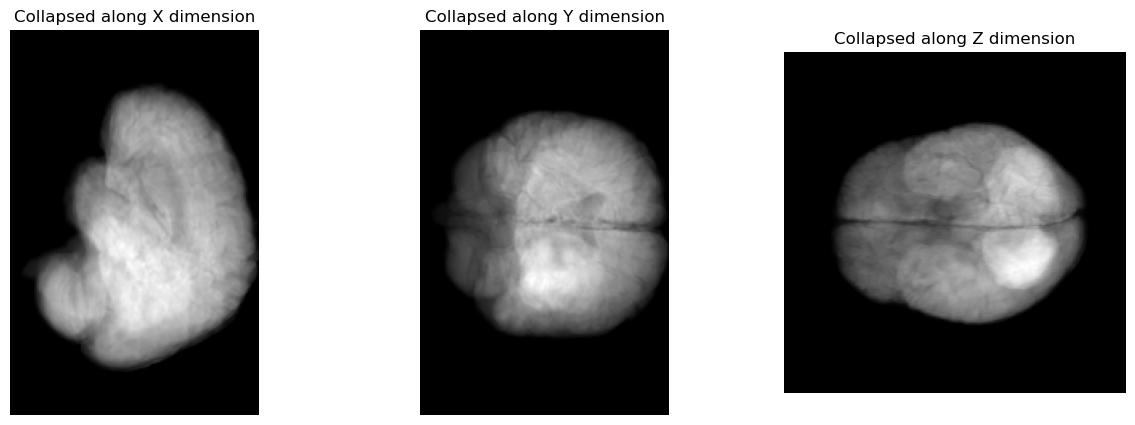

In [6]:
# Obtain a representative value for each element in the matrix by collapsing the matrix along a specific dimension using the average value along that dimension
collapsed_matrix_z = np.mean(data, axis=2)
collapsed_matrix_y = np.mean(data, axis=1)
collapsed_matrix_x = np.mean(data, axis=0)

# Plotting the collapsed matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the collapsed matrix along the x-axis
axes[0].imshow(collapsed_matrix_x, cmap='gray')
axes[0].set_title('Collapsed along X dimension')
axes[0].axis('off')

# Plotting the collapsed matrix along the y-axis
axes[1].imshow(collapsed_matrix_y, cmap='gray')
axes[1].set_title('Collapsed along Y dimension')
axes[1].axis('off')
    
# Plotting the collapsed matrix along the z-axis
axes[2].imshow(collapsed_matrix_z, cmap='gray')
axes[2].set_title('Collapsed along Z dimension')
axes[2].axis('off')

plt.show()

The presented code effectively collapses the 3D MRI image along the X, Y, and Z dimensions, producing 2D representations of the average values along each of these axes. While this approach offers a simplified overview of the data, it is important to consider the potential implications of such collapsing.

Upon observation, it becomes evident that the resultant collapsed matrices exhibit a considerable level of blurriness. This blur can be attributed to the nature of averaging values along a dimension, which can smooth out fine details and result in a generalized representation. Consequently, distinguishing between a large tumor and a blurry image becomes challenging.

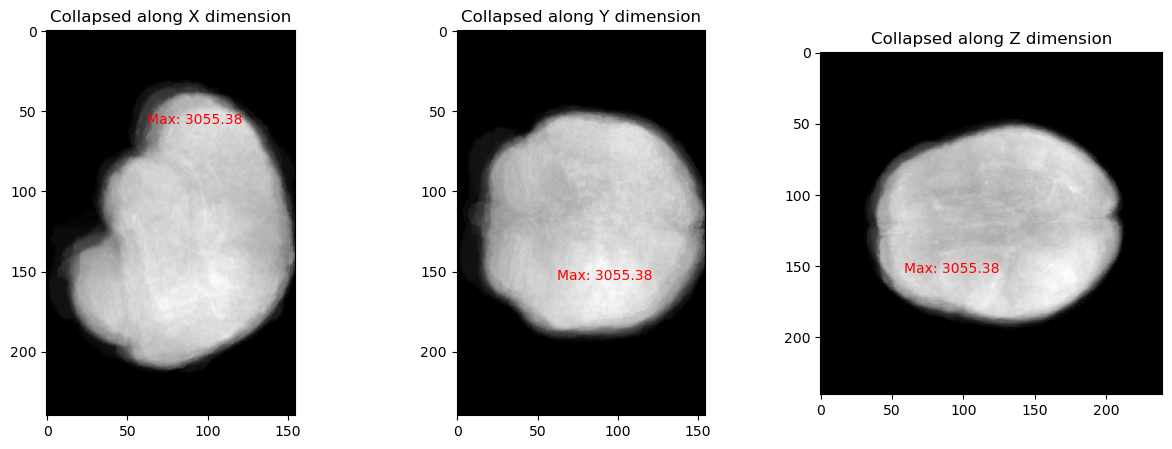

In [24]:
# Specify the folder path where the images are located
folder_path = 'The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'

# Create empty lists to store the matrices
matrix_z = []
matrix_y = []
matrix_x = []

# Load and extract the 2D slices along X, Y, and Z dimensions
for file_name in os.listdir(folder_path):
    if file_name.endswith('.nii.gz'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the image using nibabel
        image = nib.load(file_path)
        data = image.get_fdata()
        
        # Obtain a representative value for each element in the matrix by collapsing the matrix along a specific dimension using the max value along that dimension
        collapsed_matrix_z = np.max(data, axis=2)
        collapsed_matrix_y = np.max(data, axis=1)
        collapsed_matrix_x = np.max(data, axis=0)
        
        # Append the matrices to the respective lists
        matrix_z.append(collapsed_matrix_z)
        matrix_y.append(collapsed_matrix_y)
        matrix_x.append(collapsed_matrix_x)

# Convert the lists to numpy arrays
matrix_z = np.array(matrix_z)
matrix_y = np.array(matrix_y)
matrix_x = np.array(matrix_x)

# Calculate the mean of each matrix
mean_matrix_z = np.mean(matrix_z, axis=0)
mean_matrix_y = np.mean(matrix_y, axis=0)
mean_matrix_x = np.mean(matrix_x, axis=0)

# Plotting the collapsed matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the collapsed matrix along the x-axis
axes[0].imshow(mean_matrix_x, cmap='gray')
axes[0].set_title('Collapsed along X dimension')
#axes[0].axis('off')
axes[0].text(max_indices[2][0], max_indices[1][0], f"Max: {max_value:.2f}", color='red')

# Plotting the collapsed matrix along the y-axis
axes[1].imshow(mean_matrix_y, cmap='gray')
axes[1].set_title('Collapsed along Y dimension')
#axes[1].axis('off')
axes[1].text(max_indices[2][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')
    
# Plotting the collapsed matrix along the z-axis
axes[2].imshow(mean_matrix_z, cmap='gray')
axes[2].set_title('Collapsed along Z dimension')
#axes[2].axis('off')
axes[2].text(max_indices[1][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')

plt.show()

As seen above, all patients' 3D MRI data are collapsed along the X, Y, and Z dimensions, using the maximum value along each axis. The subsequent step involves calculating the mean of the resulting matrices and plotting them as 2D images. However, the outcome of this process reveals significant drawbacks that may hinder the ability to detect anomalies or tumors in the MRI scans.

Upon careful examination, it is apparent that the mean collapsed matrices appear to be dominated by very high values across the entire brain region. This phenomenon can lead to the misleading impression that the entire brain exhibits similar intensity levels, making it exceedingly challenging to identify any subtle variations or anomalies in the data.

One of the key reasons contributing to the limitation in tumor localization when collapsing all patients' MRI images is the variation in the location of high-intensity values that represent tumors within the brain. Tumors can manifest in different regions of the brain for different patients, and the maximum intensity values associated with these tumors could occur at various locations in the 3D MRI data.

When we collapse all the MRI images and calculate the mean of the collapsed matrices, we inadvertently mix and average out the locations of the maximum intensity values. As a result, the mean collapsed matrices tend to exhibit high values across the entire brain, making it challenging to pinpoint specific regions of interest or detect subtle anomalies.

To address this issue, a patient-specific approach could be considered. By analyzing and visualizing each patient's MRI data individually, it becomes possible to identify the unique locations of high-intensity values within the brain for each patient.

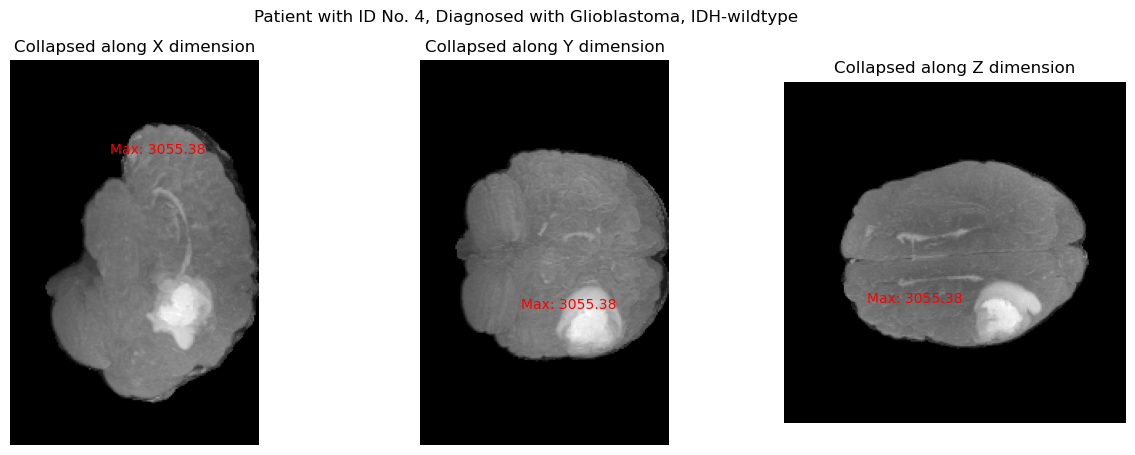

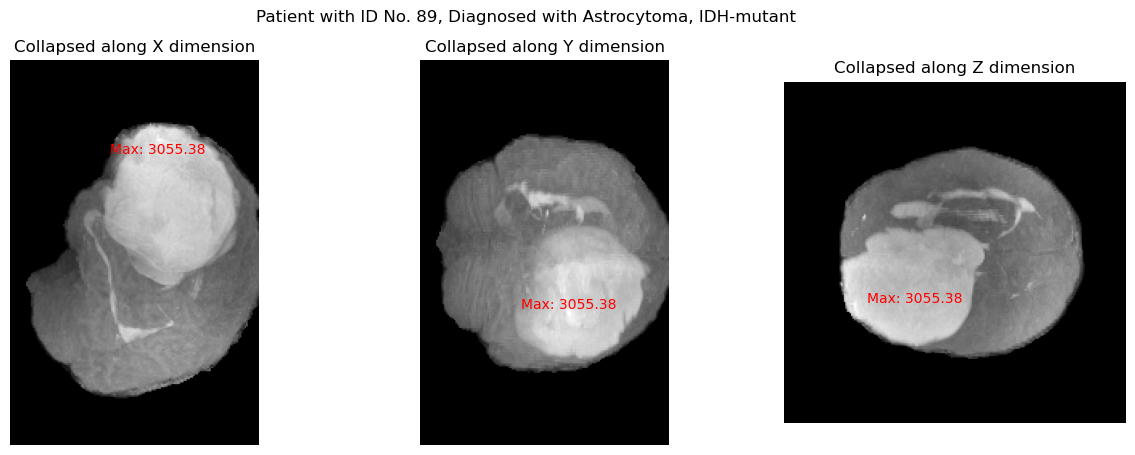

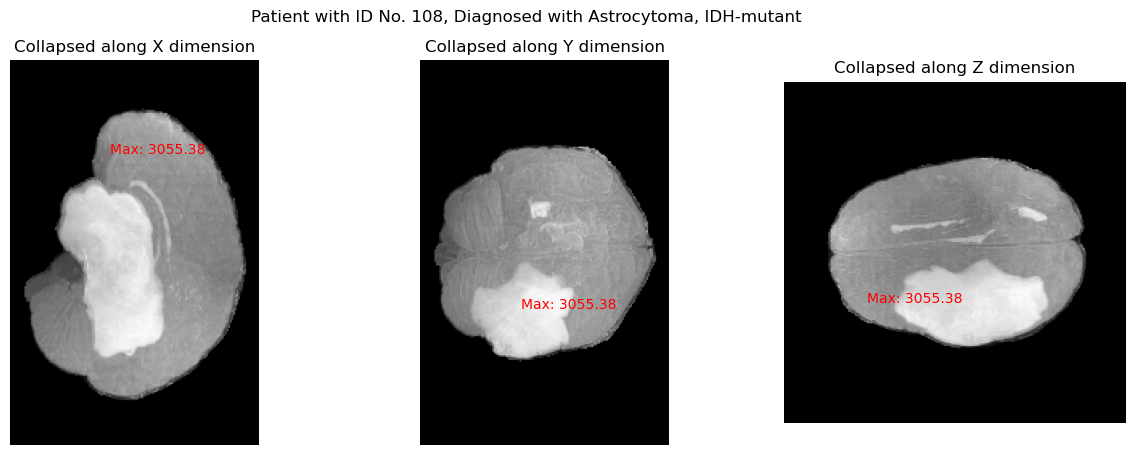

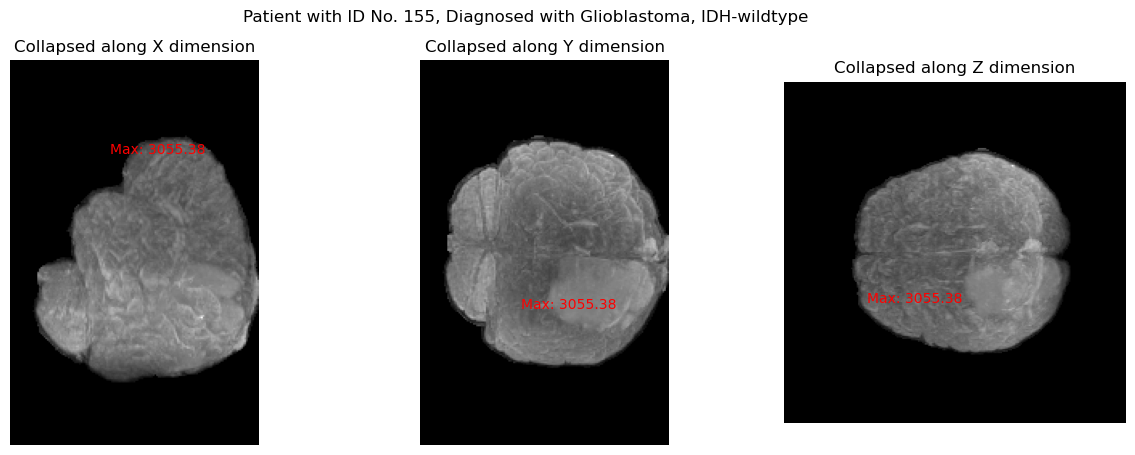

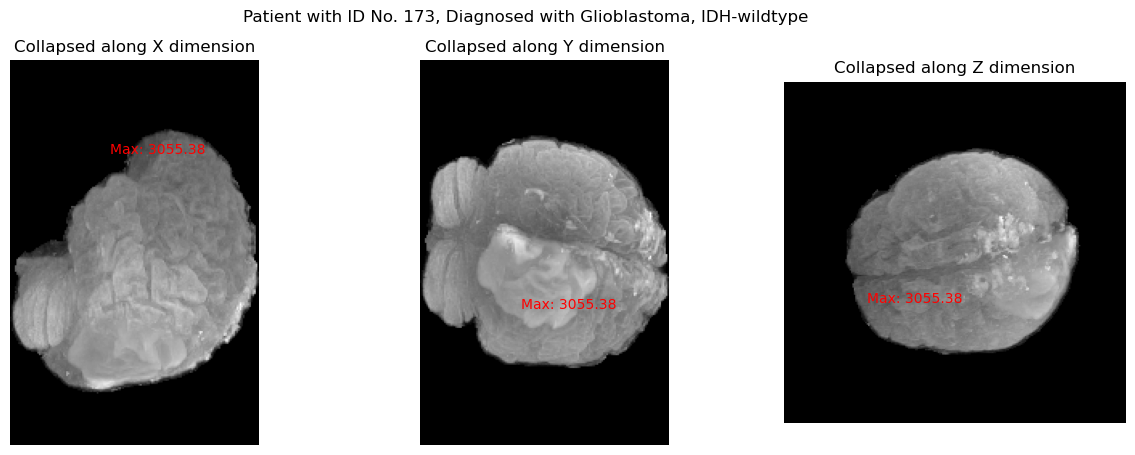

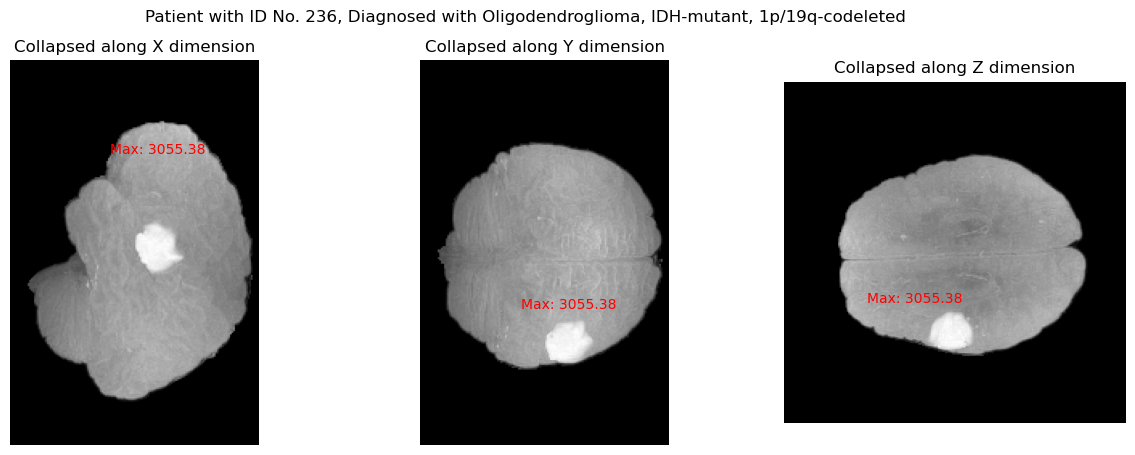

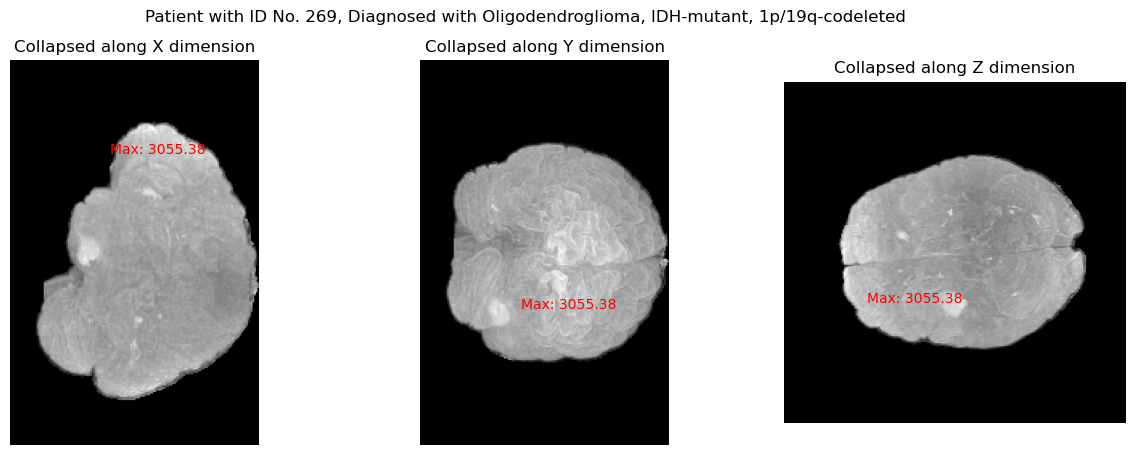

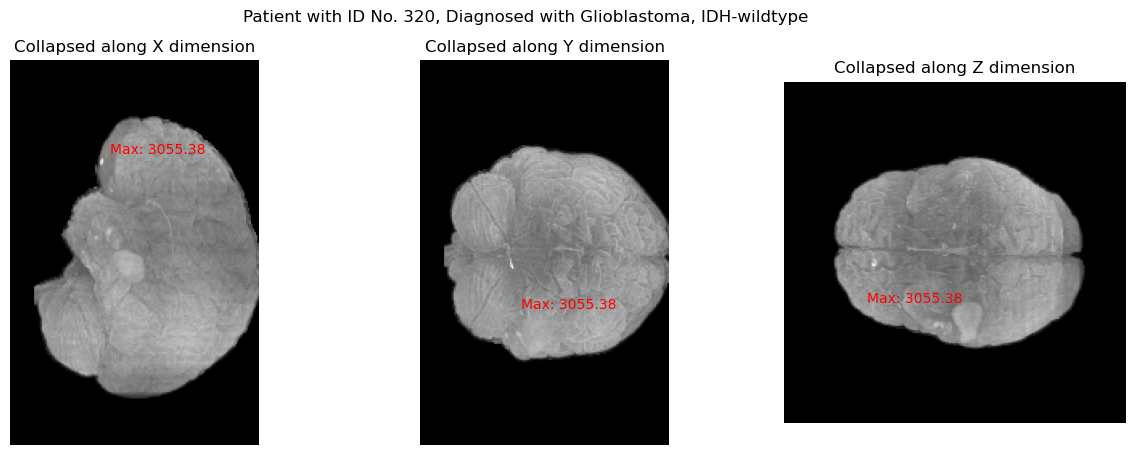

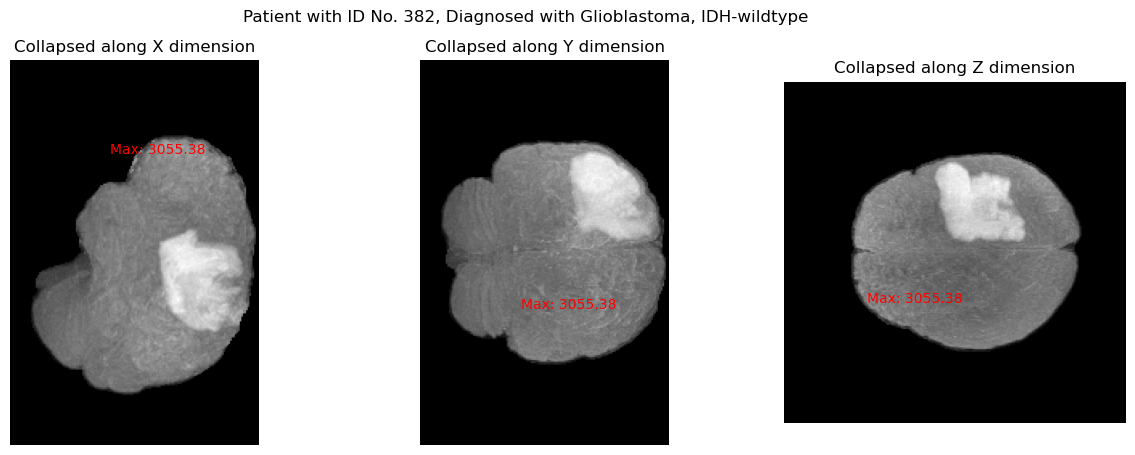

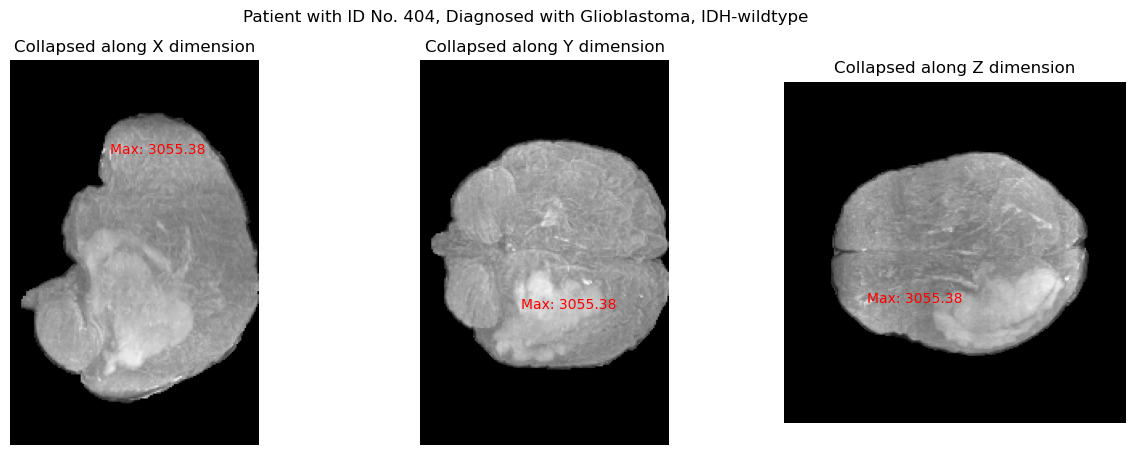

In [7]:
# Specify the folder path where the images are located
folder_path = 'The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'

# Load and extract the 2D slices along X, Y, and Z dimensions
for file_name in os.listdir(folder_path):
    if file_name.endswith('.nii.gz'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the image using nibabel
        image = nib.load(file_path)
        data = image.get_fdata()
        
        # Extract the numeric part from the image name and remove the first zero
        numeric_part = re.search(r'0*(\d+)', file_name).group(1)
        
        # Find the corresponding row in the data frame using the ID column
        row = df_clinical[df_clinical['ID'].str.contains(numeric_part)]
        
        diagnosis = row['Final pathologic diagnosis (WHO 2021)'].values[0]
        
        # Obtain a representative value for each element in the matrix by collapsing the matrix along a specific dimension using the max value along that dimension
        collapsed_matrix_z = np.max(data, axis=2)
        collapsed_matrix_y = np.max(data, axis=1)
        collapsed_matrix_x = np.max(data, axis=0)

        # Plotting the collapsed matrices
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Plotting the collapsed matrix along the x-axis
        axes[0].imshow(collapsed_matrix_x, cmap='gray')
        axes[0].set_title('Collapsed along X dimension')
        axes[0].axis('off')
        axes[0].text(max_indices[2][0], max_indices[1][0], f"Max: {max_value:.2f}", color='red')

        # Plotting the collapsed matrix along the y-axis
        axes[1].imshow(collapsed_matrix_y, cmap='gray')
        axes[1].set_title('Collapsed along Y dimension')
        axes[1].axis('off')
        axes[1].text(max_indices[2][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')
    
        # Plotting the collapsed matrix along the z-axis
        axes[2].imshow(collapsed_matrix_z, cmap='gray')
        axes[2].set_title('Collapsed along Z dimension')
        axes[2].axis('off')
        axes[2].text(max_indices[1][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')

            
        plt.suptitle(f"Patient with ID No. {numeric_part}, Diagnosed with {diagnosis}")
        plt.show()

The provided code offers an enhanced approach for visualizing brain tumors in MRI images, leveraging the collapsing technique along the X, Y, and Z dimensions using the maximum intensity values. This method yields a clearer representation of tumor regions with distinct edges and sharp boundaries, making it easier to identify areas of high intensity that indicate the presence of a tumor.

Furthermore, this visualization technique does not require an estimation of the approximate area of the tumor beforehand. The collapsing process itself automatically highlights the highest intensity regions, eliminating the need for manual segmentation or predefining regions of interest. As a result, this method is more user-friendly and efficient, allowing experts to rapidly assess multiple MRI images and identify potential tumors without the need for extensive manual intervention.

Our analysis successfully identifies and visualizes tumor-specific MRI slices from the UCSF-PDGM dataset. The collapsed matrices allow us to pinpoint the most relevant regions associated with Diffuse Glioma, facilitating potential further research and medical decision-making. The collapsed matrices reveal the prominent tumor regions for each patient. We plot the MRI slices, highlighting the tumor-specific areas using red markers. 

### Visualization of 2D MRI Images for Healthy Brain

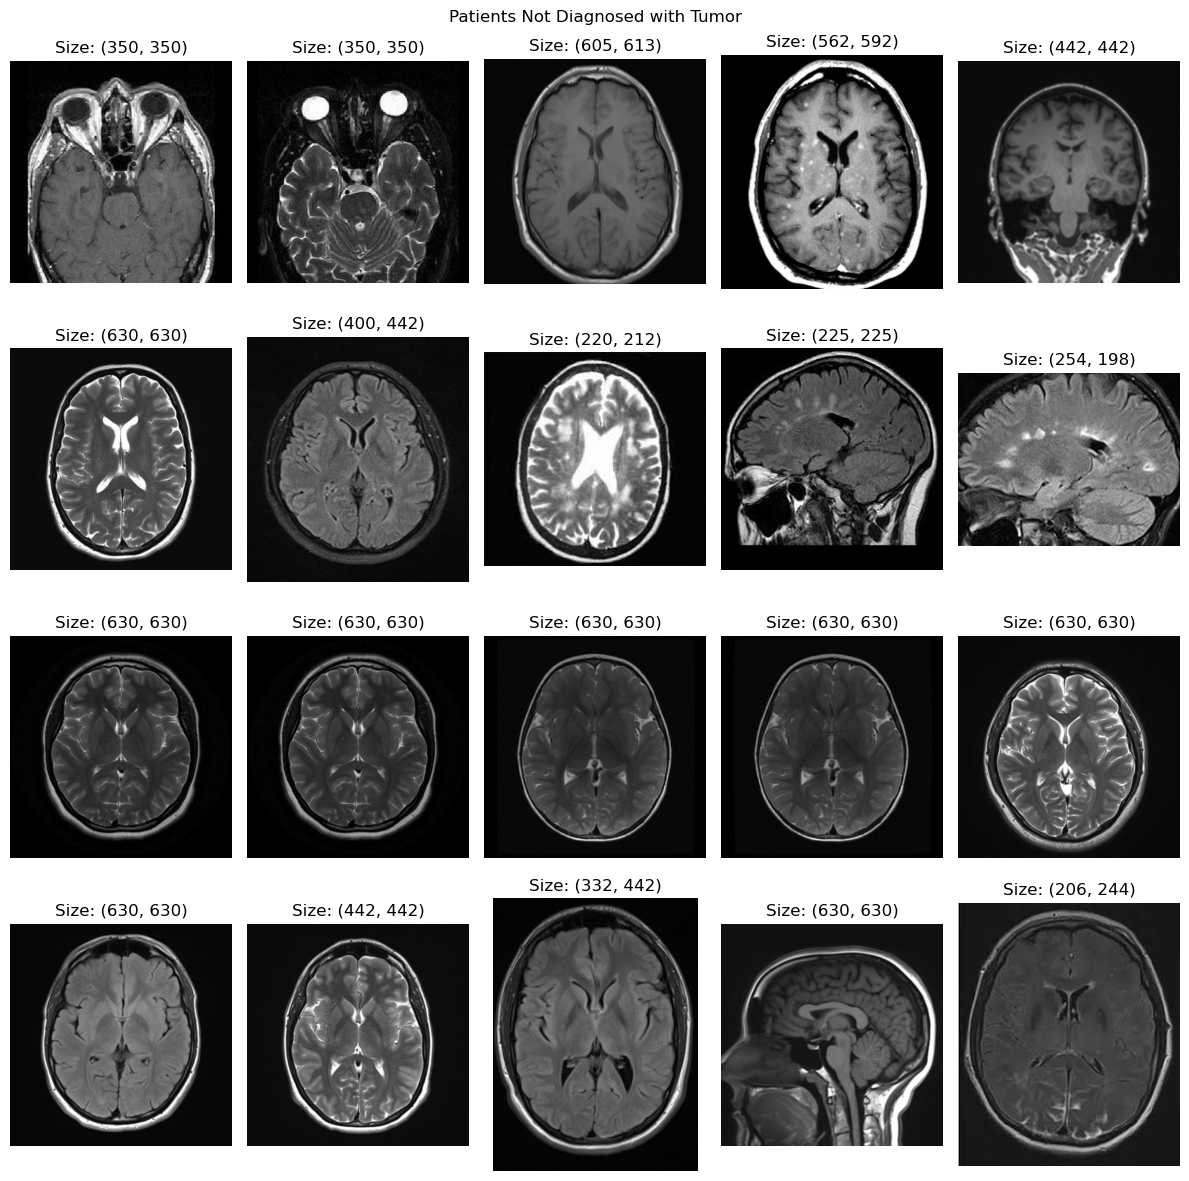

In [38]:
# Specify the folder path where the images are located
directory = r'C:\Users\mojta\Downloads\MRIs\noTumor'

# Get the list of files in the directory
files = os.listdir(directory)
# Filter only the JPG files
jpg_files = [file for file in files if file.endswith('.jpg')]
# Sort the files alphabetically
jpg_files.sort()

# Plot the first 10 images
fig = plt.figure(figsize=(12, 12))

for i in range(20):
    # Load and display the image
    image_path = os.path.join(directory, jpg_files[i])
    image = Image.open(image_path)
    ax = fig.add_subplot(4, 5, i + 1)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f"Size: {image.size}")

plt.suptitle(f"Patients Not Diagnosed with Tumor")
plt.tight_layout()
plt.show()

In order to enhance the performance and generalizability of our model, we have augmented the dataset of brain tumors with additional "no-tumor" class images. 

These "no-tumor" images were acquired from the Br35H dataset (ID: 10.34740/kaggle/dsv/2645886). By incorporating this diverse set of data, our model gains the ability to better distinguish between tumor and non-tumor instances, contributing to a more robust and accurate analysis.

In [43]:
# Specify the folder path where the no-tumor images are located
folder_path = r'C:\Users\mojta\Downloads\MRIs\noTumor'        

# List to store the matrices
healthy_images = []

# Load 2D images of healthy brains (JPEG format)
for file_name in os.listdir(folder_path):
    if file_name.endswith('.jpg'):
        file_path = os.path.join(folder_path, file_name)
        image = Image.open(file_path)
        # Convert the image to grayscale
        grayscale_image = image.convert("L")
        # Resize the grayscale image to (240, 240) using PIL
        resized_matrix = grayscale_image.resize((240, 240))
        healthy_images.append(np.array(resized_matrix))
    
# Save the 'healthy_images' list to a compressed NumPy file in the current working directory
output_file_path = 'healthy_images.npz'
np.savez_compressed(output_file_path, *healthy_images)

print(f'No-Tumor images saved to {output_file_path}')

No-Tumor images saved to healthy_images.npz


Here, the healthy brain images are processed for further analysis and machine learning tasks by standardizing their size and efficiently storing them in a compressed format. The saved NumPy file provides a compact and consistent dataset ready for future data analysis, visualization, and modeling tasks.

the provided code offers several advantages, including standardization, memory efficiency, compressed storage, faster processing, and improved data analysis, which collectively enhance the quality and efficiency of working with the healthy brain image dataset.

In the following, 2D slices from the tumor MRI images are extracted and each slice along the X, Y, and Z dimensions collapsed. Then the collapsed matrices are resized to a uniform size of (240, 240) using PIL. The resized matrices are then converted back to NumPy arrays and saved in a compressed NumPy file. This preprocessing step ensures that all tumor images have the same size and allows for consistent and efficient analysis in downstream tasks such as tumor segmentation and classification. 

Overall, resizing the tumor images to a standardized size is an essential preprocessing step that enhances data quality, facilitates efficient analysis, and contributes to building better-performing machine learning models in the medical image analysis domain.

In [35]:
# Specify the folder path where the tumor images are located
folder_path = r'C:\Users\mojta\Downloads\MRIs\Tumor'

# Create the "tumor" folder if it doesn't exist
output_folder = 'tumor'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List to store the collapsed matrices
tumor_images = []

# Load and extract the 2D slices along X, Y, and Z dimensions
for file_name in os.listdir(folder_path):
    if file_name.endswith('.nii.gz'):
        file_path = os.path.join(folder_path, file_name)

        # Load the image using nibabel
        image = nib.load(file_path)
        data = image.get_fdata()

        # Obtain a representative value for each element in the matrix by collapsing the matrix along a specific dimension using the max value along that dimension
        axes = [None] * 3  # List to store axes for each dimension
        for axis in range(3):
            collapsed_matrix = np.max(data, axis=axis)
            # Resize the matrix to (240, 240) using PIL
            resized_matrix = Image.fromarray(collapsed_matrix).resize((240, 240))
            # Convert the resized matrix back to numpy array
            resized_matrix = np.array(resized_matrix)
            # Append the resized matrix to the list
            tumor_images.append(resized_matrix)
            
# Save the 'tumor_images' list to a compressed NumPy file in the current working directory
output_file_path = 'tumor_images.npz'
np.savez_compressed(output_file_path, *tumor_images)

print(f'Tumor images saved to {output_file_path}')

Tumor images saved to tumor_images.npz


Finally, the tumor images and no-tumor images are analyzed and visualized. Printing the shapes of the first five images helps to quickly inspect the dimensions of the images and ensure that they have been processed correctly.

The printed shapes indicate that all the images have a size of (240, 240), which suggests that the resizing and preprocessing steps have been performed correctly and consistently. The Total number of images line provides the total count of images in the dataset.

In [36]:
for i in range(min(5, len(tumor_images))):
    print(f"Image {i+1} shape: {tumor_images[i].shape}")

# Print the total number of images
print(f"Total number of images: {len(tumor_images)}")

Image 1 shape: (240, 240)
Image 2 shape: (240, 240)
Image 3 shape: (240, 240)
Image 4 shape: (240, 240)
Image 5 shape: (240, 240)
Total number of images: 1485


In [44]:
for i in range(min(5, len(healthy_images))):
    print(f"Image {i+1} shape: {healthy_images[i].shape}")

# Print the total number of images
print(f"Total number of images: {len(healthy_images)}")

Image 1 shape: (240, 240)
Image 2 shape: (240, 240)
Image 3 shape: (240, 240)
Image 4 shape: (240, 240)
Image 5 shape: (240, 240)
Total number of images: 1594
